In [34]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
def computeCost(X,Y,theta):
    inner=np.power((( X * theta.T )- Y ),2)
    suminner=np.sum(inner)
    return suminner/(2*len(X))

In [36]:
def gradecent(X,Y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    parameters=int(theta.shape[1])
    cost=np.zeros(iters)
    for i in range(iters):
        error=X*theta.T-Y
        for j in range(parameters):
            term=np.multiply(error,X[:,j])
            temp[0,j]=theta[0,j]-(alpha/len(X))*np.sum(term)
            
        theta=temp
        cost[i]=computeCost(X,Y,theta)
    return theta , cost

In [37]:
def normalize(X):
    f_standValue = X.std()
    Xnor = (X) / f_standValue
    return Xnor,f_standValue

In [38]:
def predict(X,theta):
    result = X * theta.T
    return result

In [39]:
path=os.getcwd() +'/finalExercise.txt'
data=pd.read_csv(path,header=None,names=['Height', 'Age', 'Weight'])
dataStand,standCoefficient = normalize(data)


In [40]:
cols=dataStand.shape[1]
X=np.matrix(dataStand.iloc[:,0:cols-1])
Y=np.matrix(dataStand.iloc[:,cols-1:cols])
theta=np.matrix(np.zeros(X.shape[1],dtype=int))

In [41]:
beforeTrainCost = computeCost(X,Y,theta)
alpha=0.0001
iters=500
resultTheta,resultCost=gradecent(X,Y,theta,alpha,iters)
afterTrainCost = computeCost(X,Y,resultTheta)
print("beforeTrainCost => "+format(beforeTrainCost))
print("afterTrainCost => "+format(afterTrainCost))

beforeTrainCost => 12.92766658221434
afterTrainCost => 0.4509195870714757


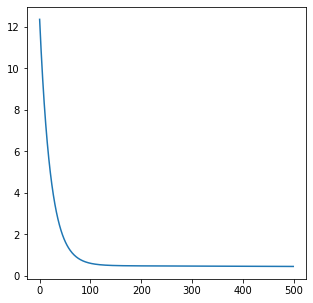

In [42]:
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(np.arange(iters),resultCost)

In [43]:
TestData = np.array([5.5,38])
TestDataNor = TestData / standCoefficient[0:len(standCoefficient)-1]
TestDataNor = TestDataNor[np.newaxis,:]
resultWeight = predict(TestDataNor,resultTheta) * standCoefficient[len(standCoefficient)-1]
resultWeight = np.round(resultWeight.max())
print("resultWeight = > "+ format(resultWeight))

resultWeight = > 59.0


In [44]:
py=resultTheta[0,0]*X[:,0]+resultTheta[0,1]*X[:,1]
err=abs(data.Weight-np.array(py).ravel())
acc=data.Weight-np.array(py).ravel()/data.Weight
print("accuracy => "+ format(acc.mean()))


accuracy => 57.2101458193775


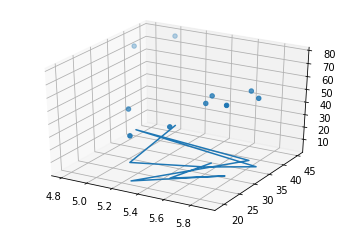

In [45]:
from mpl_toolkits.mplot3d import Axes3D
x2=np.linspace(data.Age.min(),data.Age.max(),47)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(data.Height,data.Age,np.array(py).ravel())
ax.scatter(data.Height,data.Age,data.Weight)